In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd

In [18]:
df_pd=pd.read_excel(r"C:\Users\Bhuveeta Sarohi\Downloads\AQI_hourly_city_level_sohna_2023\AQI_hourly_city_level_sohna_2023.xlsx")
df=dd.from_pandas(df_pd, npartitions=4)
df.head()

,Days,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,1,265,211.0,204.0,191,186.0,184.0,161.0,143,151.0,...,150.0,124.0,128,122.0,111.0,111.0,180.0,240,260.0,280.0
1,2,313,332.0,327.0,300,293.0,278.0,270.0,272,274.0,...,399.0,390.0,384,392.0,378.0,349.0,349.0,350,339.0,331.0
2,3,328,302.0,316.0,323,340.0,346.0,353.0,363,370.0,...,418.0,404.0,394,374.0,360.0,381.0,374.0,383,404.0,397.0
3,4,376,355.0,343.0,347,332.0,337.0,327.0,304,275.0,...,309.0,293.0,293,285.0,282.0,275.0,300.0,328,372.0,377.0
4,5,388,376.0,378.0,375,357.0,326.0,283.0,203,157.0,...,300.0,292.0,293,298.0,318.0,256.0,340.0,359,390.0,396.0


In [19]:
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 25 entries, Days to 23:00:00
dtypes: float64(16), int64(9)

In [20]:
print("Shape of dataset:", df.shape)
print("Column names:", df.columns)
print("Missing values in each column:")
print("Null values:", df.isnull().sum())

Shape of dataset: (Delayed('int-50a9f8a9-9437-4654-ac27-70ef2e3cd37f'), 25)
Column names: Index(['Days', '00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
       '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00', '10:00:00',
       '11:00:00', '12:00:00', '13:00:00', '14:00:00', '15:00:00', '16:00:00',
       '17:00:00', '18:00:00', '19:00:00', '20:00:00', '21:00:00', '22:00:00',
       '23:00:00'],
      dtype='object')
Missing values in each column:
Null values: Dask Series Structure:
npartitions=1
00:00:00    int64
Days          ...
dtype: int64
Dask Name: dataframe-sum-agg, 4 graph layers


In [21]:
numeric_cols = df.columns[1:]
def fill_na_with_median(df_partition):
    for col in numeric_cols:
        median_val = df_partition[col].median()
        df_partition.loc[:, col] = df_partition[col].fillna(median_val)
    return df_partition
df = df.map_partitions(fill_na_with_median, meta=df._meta)
df = df.compute()
print(df.isnull().sum())

Days        0
00:00:00    0
01:00:00    0
02:00:00    0
03:00:00    0
04:00:00    0
05:00:00    0
06:00:00    0
07:00:00    0
08:00:00    0
09:00:00    0
10:00:00    0
11:00:00    0
12:00:00    0
13:00:00    0
14:00:00    0
15:00:00    0
16:00:00    0
17:00:00    0
18:00:00    0
19:00:00    0
20:00:00    0
21:00:00    0
22:00:00    0
23:00:00    0
dtype: int64


In [22]:
df_long = pd.melt(df, id_vars='Days', var_name='Time', value_name='AQI')
df_long['Datetime'] = pd.to_datetime('2022-01-01') + pd.to_timedelta(df_long['Days'], unit='D')
df_long['Datetime'] = pd.to_datetime(df_long['Datetime'].dt.date.astype(str) + ' ' + df_long['Time'])
df_long = df_long.sort_values('Datetime').reset_index(drop=True)
print(df_long.head())

   Days      Time    AQI            Datetime
0     1  00:00:00  265.0 2022-01-02 00:00:00
1     1  01:00:00  211.0 2022-01-02 01:00:00
2     1  02:00:00  204.0 2022-01-02 02:00:00
3     1  03:00:00  191.0 2022-01-02 03:00:00
4     1  04:00:00  186.0 2022-01-02 04:00:00


In [25]:
df.describe().compute()

,Days,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,183.000000,216.369863,210.676712,205.895890,202.512329,197.079452,192.367123,188.363014,185.753425,187.350685,...,178.219178,174.046575,168.180822,161.521918,160.342466,166.413699,179.580822,197.638356,212.428767,216.264384
std,105.510663,98.232387,97.447786,97.408904,97.061343,94.365182,93.376863,93.647180,92.702819,92.851694,...,86.718860,84.961307,82.711037,77.133319,78.099405,81.394719,86.289999,93.113901,96.398457,98.309960
min,1.000000,37.000000,46.000000,43.000000,44.000000,42.000000,42.000000,42.000000,42.000000,42.000000,...,43.000000,49.000000,47.000000,44.000000,45.000000,48.000000,53.000000,49.000000,42.000000,32.000000
25%,69.250000,172.500000,162.000000,154.000000,154.250000,150.500000,142.250000,139.500000,139.000000,143.500000,...,124.000000,116.750000,112.000000,105.000000,110.000000,117.000000,123.000000,141.250000,164.000000,168.500000
50%,160.500000,233.000000,230.500000,222.500000,215.500000,213.000000,211.500000,208.000000,203.000000,210.000000,...,167.500000,158.500000,159.000000,154.500000,162.500000,162.500000,161.500000,197.000000,230.000000,242.000000
75%,251.500000,322.000000,316.000000,319.250000,316.250000,299.750000,320.500000,286.000000,274.500000,279.000000,...,259.500000,275.000000,230.000000,244.000000,265.000000,254.000000,270.500000,296.250000,324.750000,330.250000
max,365.000000,464.000000,447.000000,455.000000,490.000000,467.000000,458.000000,426.000000,426.000000,419.000000,...,500.000000,490.000000,459.000000,439.000000,474.000000,475.000000,485.000000,484.000000,484.000000,487.000000


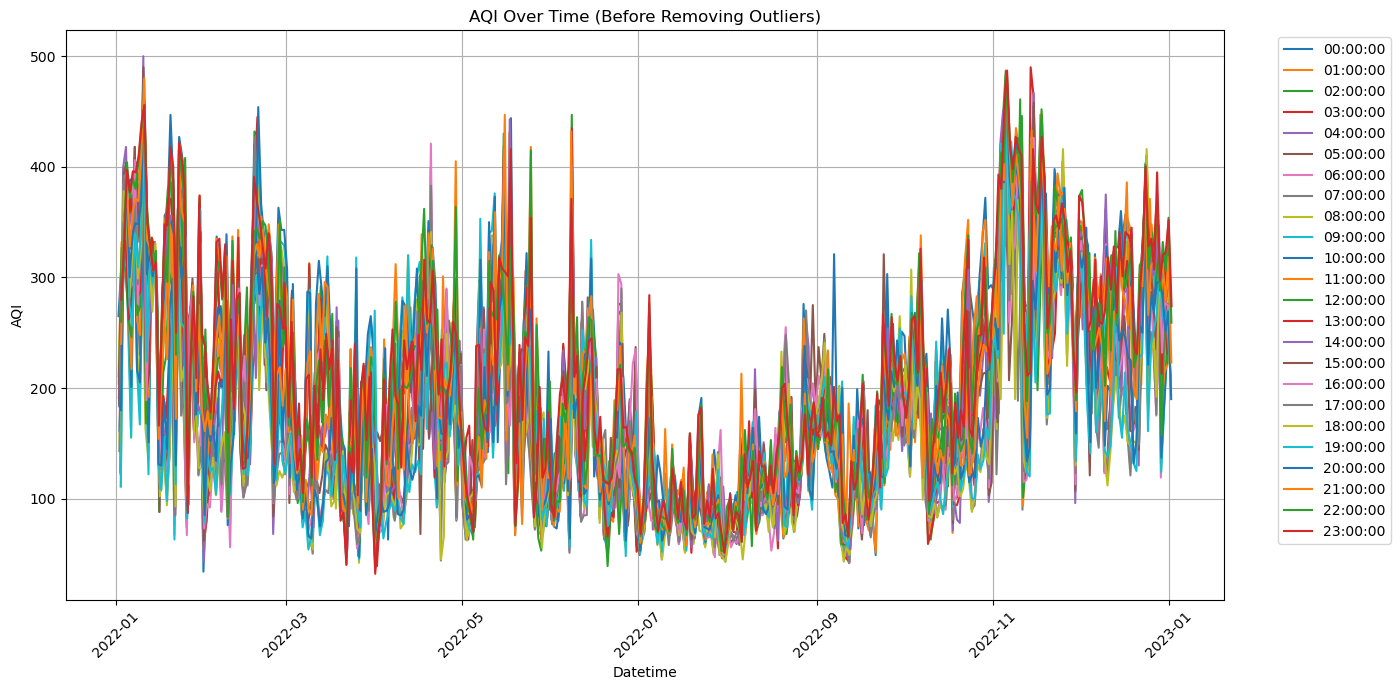

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

for hour in df_long['Time'].unique():
    hourly_data = df_long[df_long['Time'] == hour]
    plt.plot(hourly_data['Datetime'], hourly_data['AQI'], label=hour)

plt.title('AQI Over Time (Before Removing Outliers)')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
for col in df.columns[1:]:  # Skipping the 'Days' column
    df = remove_outliers(df, col)

In [36]:
df.describe().compute()

,Days,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,...,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,181.724638,252.584541,247.869565,241.710145,237.550725,231.130435,224.685990,221.386473,221.309179,224.367150,...,202.280193,195.884058,188.671498,180.328502,176.410628,182.260870,199.434783,222.386473,243.673913,247.275362
std,121.005442,77.192870,77.387484,76.093026,76.477017,74.125893,72.246631,70.697327,70.022819,68.400949,...,66.841493,66.850987,65.781695,64.395760,66.179592,70.195632,72.950138,77.799627,79.534026,80.651573
min,1.000000,96.000000,91.000000,68.000000,83.000000,82.000000,86.000000,81.000000,83.000000,91.000000,...,68.000000,68.000000,69.000000,44.000000,45.000000,54.000000,64.000000,77.000000,99.000000,83.000000
25%,65.000000,213.000000,197.000000,193.500000,195.000000,182.000000,184.000000,186.250000,182.000000,176.500000,...,172.000000,161.250000,152.000000,139.500000,131.750000,134.750000,159.750000,191.000000,203.750000,200.750000
50%,142.750000,267.000000,254.000000,253.000000,249.000000,241.250000,237.000000,231.000000,227.500000,223.000000,...,203.000000,212.000000,207.250000,187.000000,194.500000,183.500000,212.750000,239.000000,261.750000,255.000000
75%,297.750000,321.000000,316.000000,316.000000,312.000000,297.000000,290.000000,286.000000,276.000000,278.000000,...,261.000000,249.000000,230.000000,244.000000,246.250000,254.000000,270.750000,303.750000,322.250000,329.000000
max,365.000000,460.000000,447.000000,447.000000,435.000000,403.000000,391.000000,388.000000,403.000000,402.000000,...,347.000000,336.000000,329.000000,330.000000,360.000000,379.000000,403.000000,418.000000,434.000000,440.000000


In [38]:
df_filtered = df.compute()
df_filtered.to_csv("aqi_cleaned1.csv", index=False)

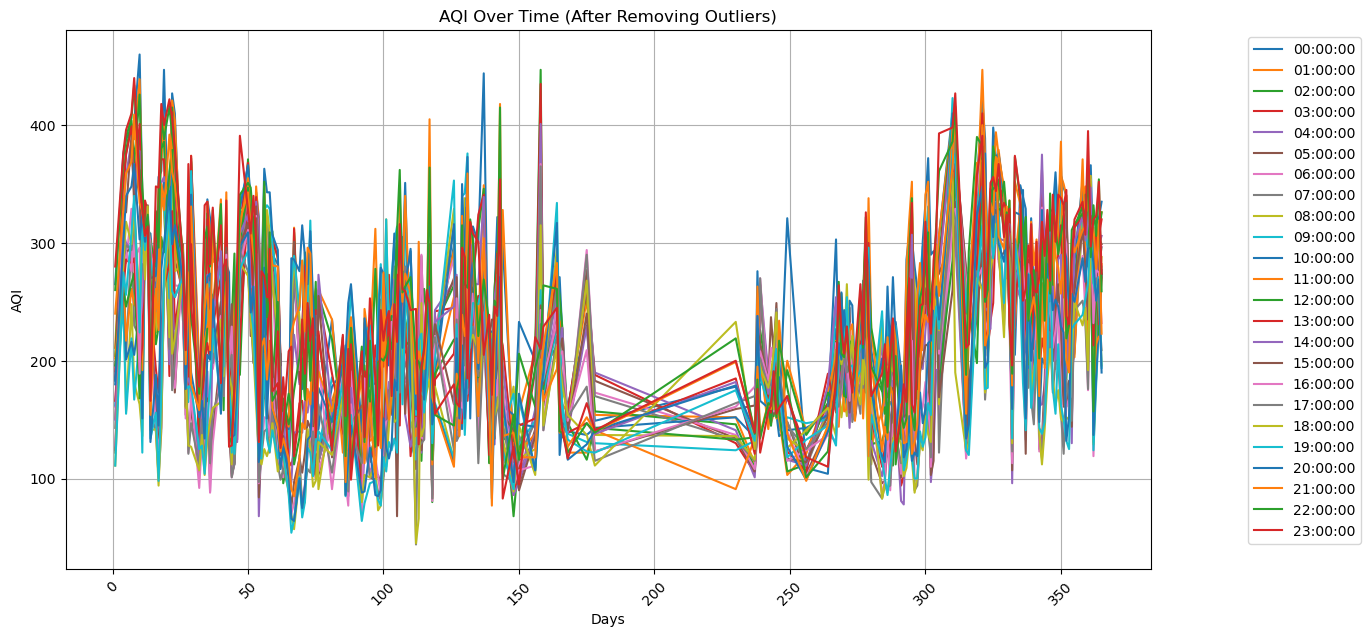

In [41]:
import matplotlib.pyplot as plt
df_computed = df.compute()
plt.figure(figsize=(14, 7))
for col in df_computed.columns[1:]:
    plt.plot(df_computed['Days'], df_computed[col], label=col)
plt.title('AQI Over Time')
plt.xlabel('Days')
plt.ylabel('AQI')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))  
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

<Figure size 1400x700 with 0 Axes>

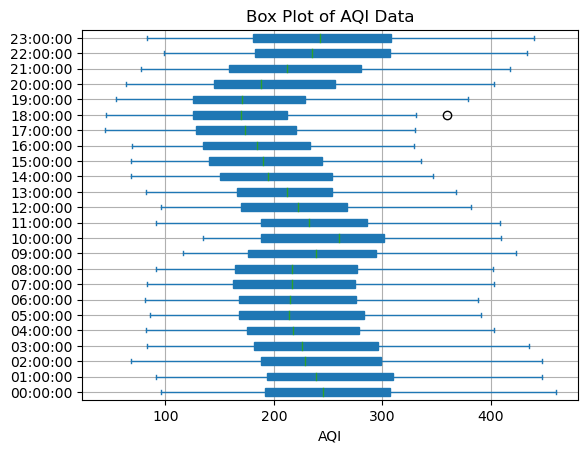

In [44]:
import matplotlib.pyplot as plt
df_computed = df.compute()  
plt.figure(figsize=(14, 7))
df_computed.drop(columns=['Days']).plot.box(vert=False, patch_artist=True)
plt.title('Box Plot of AQI Data')
plt.xlabel('AQI')
plt.grid(True)
plt.show()

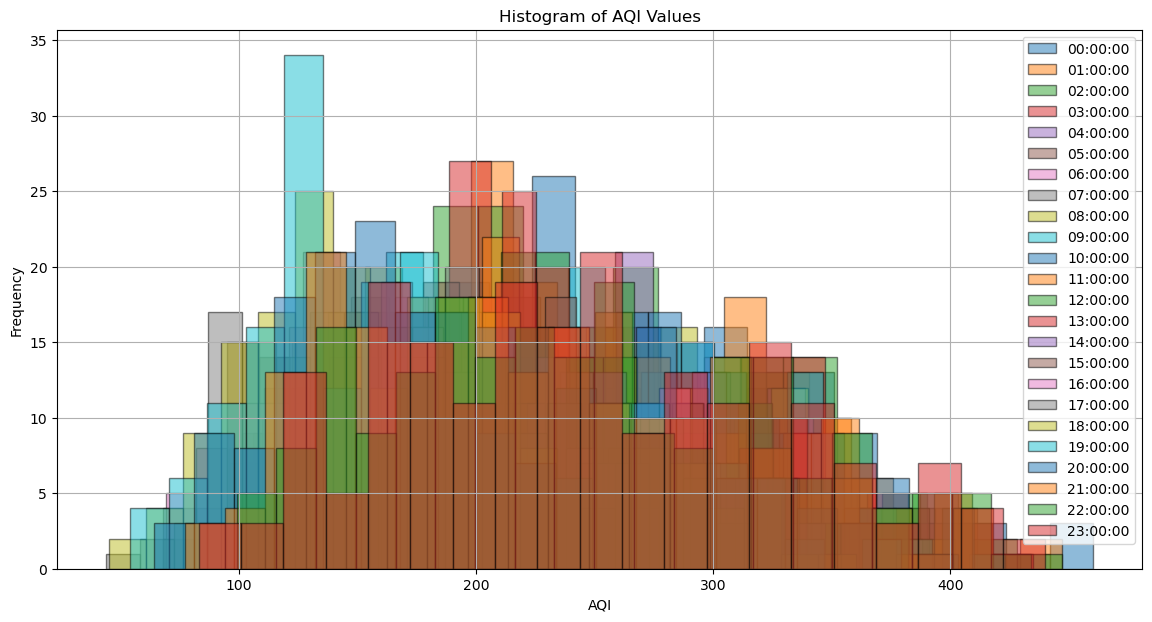

In [45]:
df_computed = df.compute() 
plt.figure(figsize=(14, 7))
for col in df_computed.columns[1:]:  
    plt.hist(df_computed[col], bins=20, alpha=0.5, label=col, edgecolor='black')
plt.title('Histogram of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

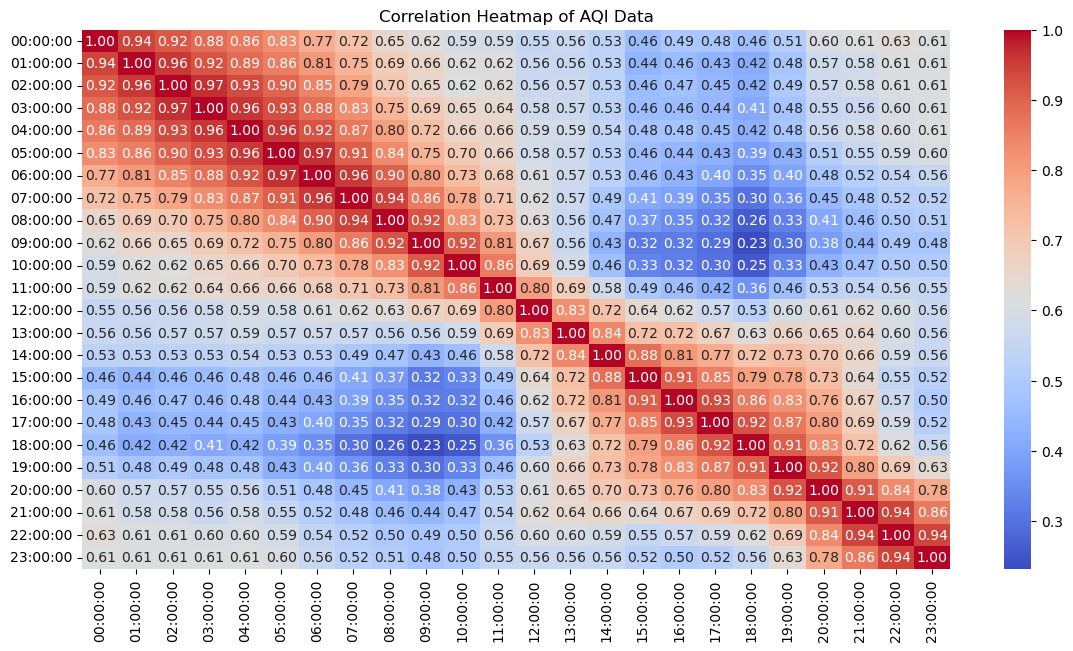

In [46]:
df_computed = df.compute()
corr_matrix = df_computed.drop(columns=['Days']).corr()
plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of AQI Data')
plt.show()

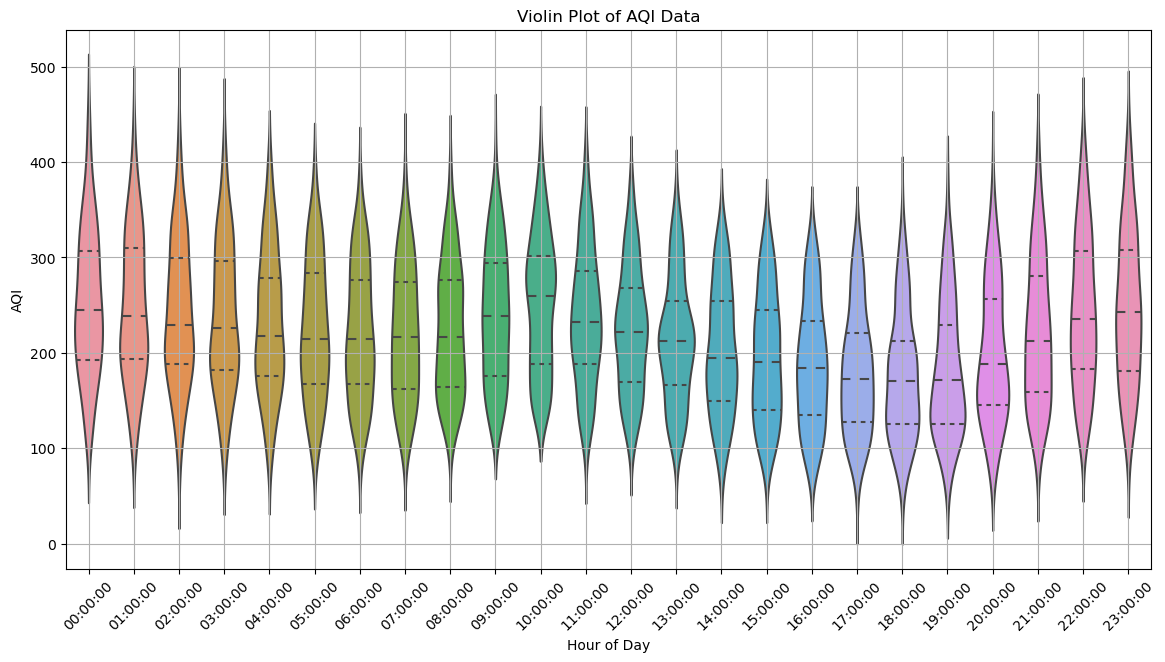

In [47]:
df_computed = df.compute()
plt.figure(figsize=(14, 7))
sns.violinplot(data=df_computed.drop(columns=['Days']), inner='quartile')
plt.title('Violin Plot of AQI Data')
plt.xlabel('Hour of Day')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

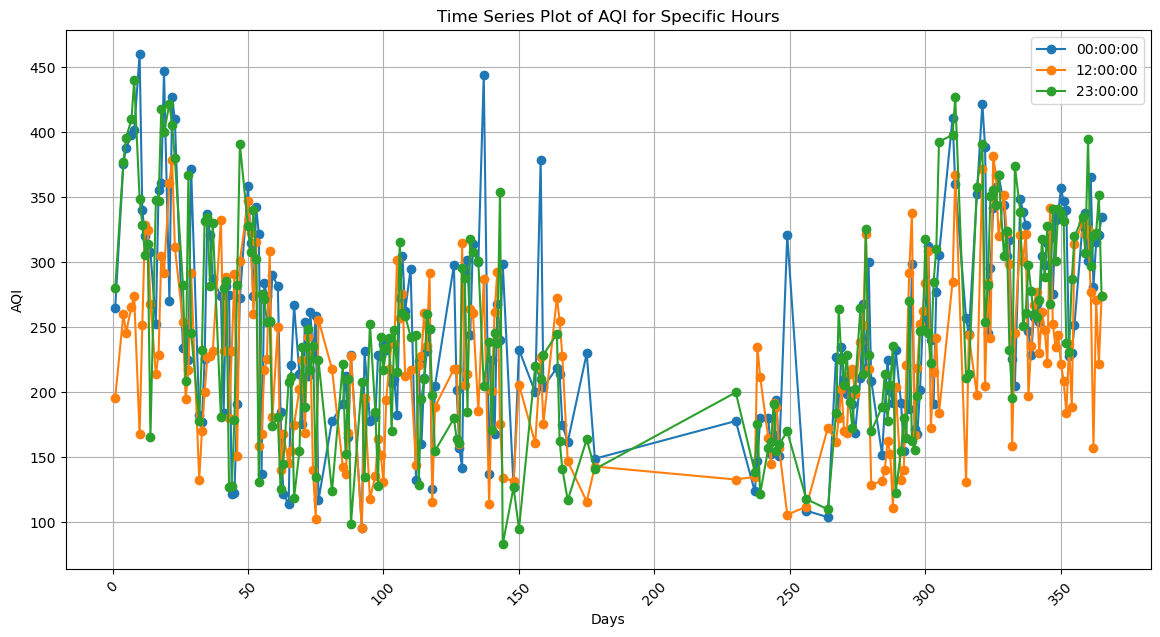

In [48]:
df_computed = df.compute()
plt.figure(figsize=(14, 7))
plt.plot(df_computed['Days'], df_computed['00:00:00'], label='00:00:00', marker='o')
plt.plot(df_computed['Days'], df_computed['12:00:00'], label='12:00:00', marker='o')
plt.plot(df_computed['Days'], df_computed['23:00:00'], label='23:00:00', marker='o')
plt.title('Time Series Plot of AQI for Specific Hours')
plt.xlabel('Days')
plt.ylabel('AQI')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

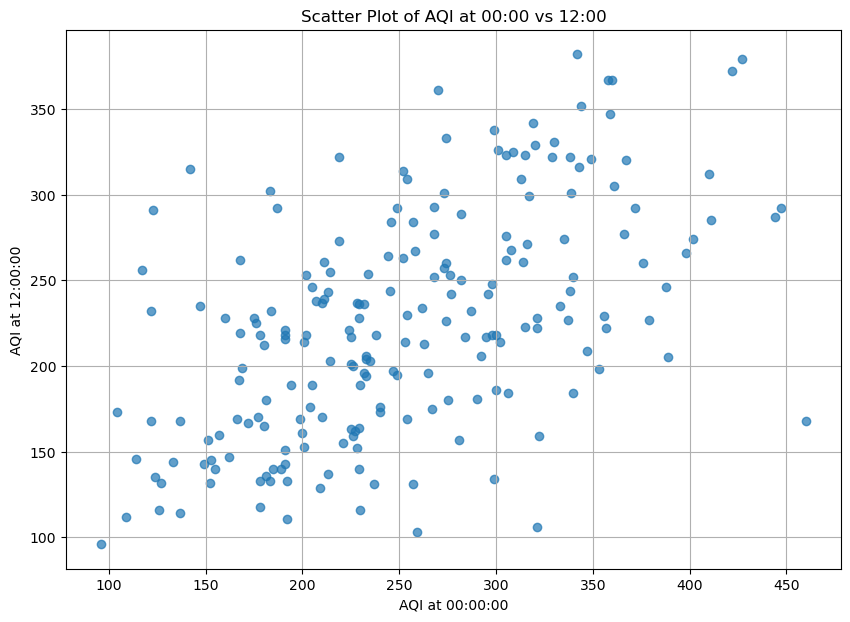

In [49]:
df_computed = df.compute()
plt.figure(figsize=(10, 7))
plt.scatter(df_computed['00:00:00'], df_computed['12:00:00'], alpha=0.7)
plt.title('Scatter Plot of AQI at 00:00 vs 12:00')
plt.xlabel('AQI at 00:00:00')
plt.ylabel('AQI at 12:00:00')
plt.grid(True)
plt.show()

In [50]:
df.corr()

,Days,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,
00:00:00,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Days,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
